In [121]:
from CPD import datasets, loss, models
from CPD import new_metrics as metrics

%load_ext autoreload
%autoreload

import pytorch_lightning as pl
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, drop_prob=0.5):
        
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim        
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)
        self.activation = nn.Sigmoid()
        
    def forward(self, input_seq):
        batch_size = input_seq.size(0)
        lstm_out, hidden = self.lstm(input_seq)  
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)      
        out = self.linear(lstm_out)
        out = self.activation(out)
        out = out.view(batch_size, -1)

        return out

In [123]:
SEQ_LEN = 128
INPUT_SIZE = 1
#HIDDEN_SIZE = 32 - for more complex case of multi_dist=True
HIDDEN_SIZE = 4


# Our approach

In [124]:
base_model_cpd = LSTM(input_size=INPUT_SIZE, output_size=SEQ_LEN, 
                      n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

cpd_model = models.CPD_model(model=base_model_cpd, T=32,
                             loss_type='CPD', experiment_type='synthetic_1D', 
                             lr=0.001, batch_size=64)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [125]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer = pl.Trainer(
    max_epochs=25, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [126]:
%load_ext tensorboard 
%tensorboard --logdir logs --port 7777

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 7777 (pid 23774), started 0:02:23 ago. (Use '!kill 23774' to kill it.)

In [127]:
trainer.fit(cpd_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 117   
1 | loss  | CPDLoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 1.502


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.028 >= min_delta = 0.01. New best score: 1.474


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.024 >= min_delta = 0.01. New best score: 1.450


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.024 >= min_delta = 0.01. New best score: 1.425


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.025 >= min_delta = 0.01. New best score: 1.401


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.024 >= min_delta = 0.01. New best score: 1.377


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.023 >= min_delta = 0.01. New best score: 1.354


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.01. New best score: 1.332


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.01. New best score: 1.310


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.01. New best score: 1.288


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.01. New best score: 1.266


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.021 >= min_delta = 0.01. New best score: 1.245


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.021 >= min_delta = 0.01. New best score: 1.224


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.021 >= min_delta = 0.01. New best score: 1.203


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.021 >= min_delta = 0.01. New best score: 1.182


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.021 >= min_delta = 0.01. New best score: 1.160


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.01. New best score: 1.139


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.01. New best score: 1.117


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.023 >= min_delta = 0.01. New best score: 1.094


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.023 >= min_delta = 0.01. New best score: 1.070


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.025 >= min_delta = 0.01. New best score: 1.045


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.026 >= min_delta = 0.01. New best score: 1.020


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.028 >= min_delta = 0.01. New best score: 0.991


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.031 >= min_delta = 0.01. New best score: 0.960


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.031 >= min_delta = 0.01. New best score: 0.929


# BCE model

In [128]:
base_model_bce = LSTM(input_size=INPUT_SIZE, output_size=SEQ_LEN, 
                      n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

bce_model = models.CPD_model(model=base_model_cpd, T=32,
                             loss_type='BCE', experiment_type='synthetic_1D', 
                             lr=0.001, batch_size=64)

In [130]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer = pl.Trainer(
    max_epochs=25, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [131]:
trainer.fit(bce_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.697


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.090 >= min_delta = 0.01. New best score: 0.608


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0.01. New best score: 0.592


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.023 >= min_delta = 0.01. New best score: 0.569


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.023 >= min_delta = 0.01. New best score: 0.546


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.526


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.018 >= min_delta = 0.01. New best score: 0.508


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.489


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0.01. New best score: 0.473


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.01. New best score: 0.458


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.01. New best score: 0.444


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.01. New best score: 0.430


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0.01. New best score: 0.414


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 0.01. New best score: 0.398


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.018 >= min_delta = 0.01. New best score: 0.380


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.018 >= min_delta = 0.01. New best score: 0.363


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0.01. New best score: 0.347


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.01. New best score: 0.333


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.320


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.310


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.291


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0.01. New best score: 0.274


Validating: 0it [00:00, ?it/s]

# Combined

In [132]:
base_model_comb = LSTM(input_size=INPUT_SIZE, output_size=SEQ_LEN, 
                       n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

combined_model_1 = models.CPD_model(model=base_model_comb, T=None,
                                    loss_type='BCE', experiment_type='synthetic_1D', 
                                    lr=0.001, batch_size=64)

combined_model_2 = models.CPD_model(model=base_model_comb, T=32,
                                    loss_type='CPD', experiment_type='synthetic_1D', 
                                    lr=0.001, batch_size=64)

In [133]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer_1 = pl.Trainer(
    max_epochs=15, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

trainer_2 = pl.Trainer(
    max_epochs=10, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [134]:
trainer_1.fit(combined_model_1)
trainer_2.fit(combined_model_2)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.663


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 0.01. New best score: 0.646


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 0.01. New best score: 0.629


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.018 >= min_delta = 0.01. New best score: 0.611


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.591


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.01. New best score: 0.570


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.023 >= min_delta = 0.01. New best score: 0.547


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.024 >= min_delta = 0.01. New best score: 0.523


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.024 >= min_delta = 0.01. New best score: 0.499


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.023 >= min_delta = 0.01. New best score: 0.476


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.01. New best score: 0.454


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.434


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.018 >= min_delta = 0.01. New best score: 0.416


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0.01. New best score: 0.400


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.01. New best score: 0.385
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 117   
1 | loss  | CPDLoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.079 >= min_delta = 0.01. New best score: 0.307


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.225 >= min_delta = 0.01. New best score: 0.082


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.251 >= min_delta = 0.01. New best score: -0.169


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.280 >= min_delta = 0.01. New best score: -0.448


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.312 >= min_delta = 0.01. New best score: -0.761


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.348 >= min_delta = 0.01. New best score: -1.109


# Calculate metrics

## Detection curve and Area under detection curve

In [135]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

In [136]:
cpd_model.to('cuda')
(_, _, delay_list, fp_delay_list) = metrics.get_pareto_metrics_for_threshold(cpd_model, 
                                                                             cpd_model.test_dataloader(), 
                                                                             threshold_list,
                                                                             verbose=False)

In [137]:
bce_model.to('cuda')
(_, _, delay_list_bce, fp_delay_list_bce) = metrics.get_pareto_metrics_for_threshold(bce_model, 
                                                                                     cpd_model.test_dataloader(), 
                                                                                     threshold_list,
                                                                                     verbose=False)

In [138]:
combined_model_2.to('cuda')
(_, _, delay_list_comb, fp_delay_list_comb) = metrics.get_pareto_metrics_for_threshold(combined_model_2, 
                                                                                       cpd_model.test_dataloader(), 
                                                                                       threshold_list,
                                                                                       verbose=False)

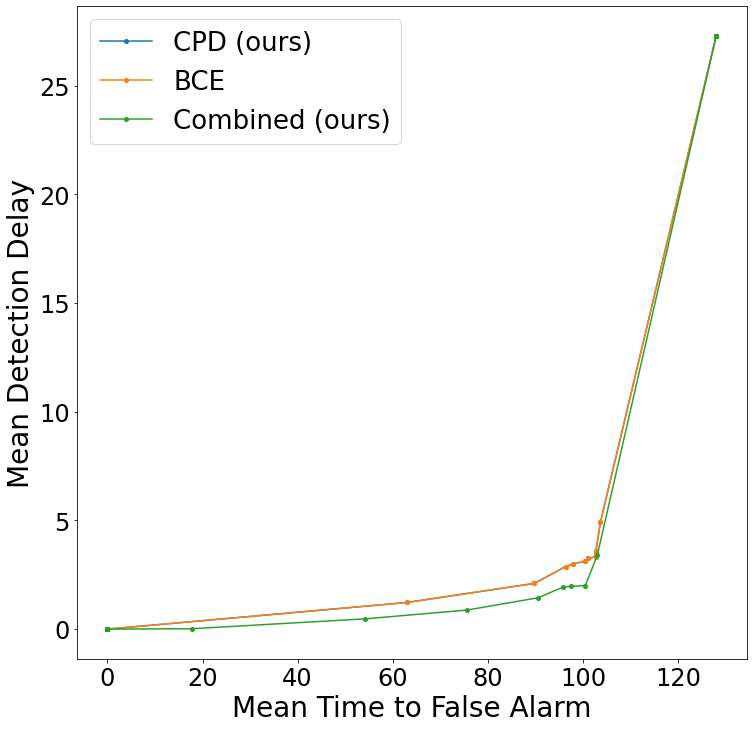

In [139]:
plt.figure(figsize=(12, 12))
plt.plot(fp_delay_list, delay_list, '-o', markersize=4, label='CPD (ours)')
plt.plot(fp_delay_list_bce, delay_list_bce, '-o', markersize=4, label='BCE')
plt.plot(fp_delay_list_comb, delay_list_comb, '-o', markersize=4, label='Combined (ours)')

plt.xlabel('Mean Time to False Alarm', fontsize=28)
plt.ylabel('Mean Detection Delay', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=26);

In [140]:
print('CPD AUC:', metrics.area_under_graph(delay_list, fp_delay_list))
print('BCE AUC:', metrics.area_under_graph(delay_list_bce, fp_delay_list_bce))
print('COMB AUC:', metrics.area_under_graph(delay_list_comb, fp_delay_list_comb))

CPD AUC: 515.0187777777777
BCE AUC: 515.0187777777777
COMB AUC: 449.0962944444444


## Cover and F1-score

In [141]:
threshold_list = []
threshold_list = [0.001, 0.005] + list(np.round(np.arange(0.1, 1, 0.1), 2))

In [142]:
cpd_cover_dict = {}
bce_cover_dict = {}
comb_cover_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
for th in threshold_list:
    cpd_cover_dict[th] = metrics.cover(cpd_model, cpd_model.val_dataloader(), th)
    bce_cover_dict[th] = metrics.cover(bce_model, cpd_model.val_dataloader(), th)    
    comb_cover_dict[th] = metrics.cover(combined_model_2, cpd_model.val_dataloader(), th)        

In [143]:
metrics_dict = cpd_cover_dict
print('BCE max COVER {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_cover_dict
print('CPD max COVER {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_cover_dict
print('COMB max COVER {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

BCE max COVER 0.9614: for threshold 0.6:
CPD max COVER 0.9614: for threshold 0.6:
COMB max COVER 0.9432: for threshold 0.4:


In [144]:
cpd_f1_dict = {}
bce_f1_dict = {}
comb_f1_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
for th in threshold_list:
    cpd_f1_dict[th] = metrics.F1_score(cpd_model, cpd_model.val_dataloader(), th)
    bce_f1_dict[th] = metrics.F1_score(bce_model, cpd_model.val_dataloader(), th)    
    comb_f1_dict[th] = metrics.F1_score(combined_model_2, cpd_model.val_dataloader(), th)        

In [145]:
metrics_dict = cpd_f1_dict
print('CPD max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_f1_dict
print('BCE max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_f1_dict
print('COMB max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))


CPD max F1 0.9297: for threshold 0.6:
BCE max F1 0.9297: for threshold 0.6:
COMB max F1 0.8889: for threshold 0.4:


In [146]:
# margin = 10
cpd_f1_lib_dict = {}
bce_f1_lib_dict = {}
comb_f1_lib_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
for th in threshold_list:
    cpd_f1_lib_dict[th] = metrics.F1_score_ruptures(cpd_model, cpd_model.val_dataloader(), th)
    bce_f1_lib_dict[th] = metrics.F1_score_ruptures(bce_model, cpd_model.val_dataloader(), th)    
    comb_f1_lib_dict[th] = metrics.F1_score_ruptures(combined_model_2, cpd_model.val_dataloader(), th)        

In [147]:
metrics_dict = cpd_f1_lib_dict
print('CPD max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_f1_lib_dict
print('BCE max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_f1_lib_dict
print('COMB max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))


CPD max F1 0.9916: for threshold 0.6:
BCE max F1 0.9916: for threshold 0.6:
COMB max F1 0.9206: for threshold 0.4:


In [148]:
# margin = 5
cpd_f1_lib_dict = {}
bce_f1_lib_dict = {}
comb_f1_lib_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
for th in threshold_list:
    cpd_f1_lib_dict[th] = metrics.F1_score_ruptures(cpd_model, cpd_model.val_dataloader(), th, margin=5)
    bce_f1_lib_dict[th] = metrics.F1_score_ruptures(bce_model, cpd_model.val_dataloader(), th, margin=5)    
    comb_f1_lib_dict[th] = metrics.F1_score_ruptures(combined_model_2, cpd_model.val_dataloader(), th, margin=5)        

In [149]:
metrics_dict = cpd_f1_lib_dict
print('CPD max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_f1_lib_dict
print('BCE max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_f1_lib_dict
print('COMB max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))


CPD max F1 0.9412: for threshold 0.6:
BCE max F1 0.9412: for threshold 0.6:
COMB max F1 0.9206: for threshold 0.4:
